In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  

In [2]:
#loading dataset
df = pd.read_csv('netflix1.csv')

In [3]:
#explore the first 5 rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
#explore num of rows and columns 
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
#check for nulls
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#duble check for nulls
df.count()

show_id         8790
type            8790
title           8790
director        8790
country         8790
date_added      8790
release_year    8790
rating          8790
duration        8790
listed_in       8790
dtype: int64

In [8]:
#check for duplictaes
df.duplicated().sum()

0

In [9]:
#explore unique values in type column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
type_freq = df['type'].value_counts()
type_freq

Movie      6126
TV Show    2664
Name: type, dtype: int64

### Q1) What is the most common type(Movies or TV Shows)?

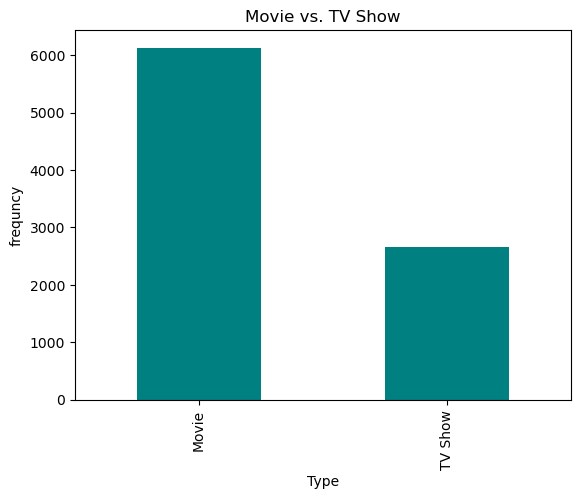

In [11]:
type_freq.plot(kind = 'bar'
               , xlabel = 'Type'
               , ylabel = 'frequncy'
               , title = 'Movie vs. TV Show'
               , color = 'teal');

In [12]:
#Explore top 10 directore in number of works
df['director'].value_counts().head(10)

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

### Note: we have a huge number of none given values, we will exclude it now
### but remeber that if we know this values the insight will be changed

In [13]:
top_10_directors = df['director'].value_counts()[1:11]

### Q2) Who are the 10 Directors in a number of works?

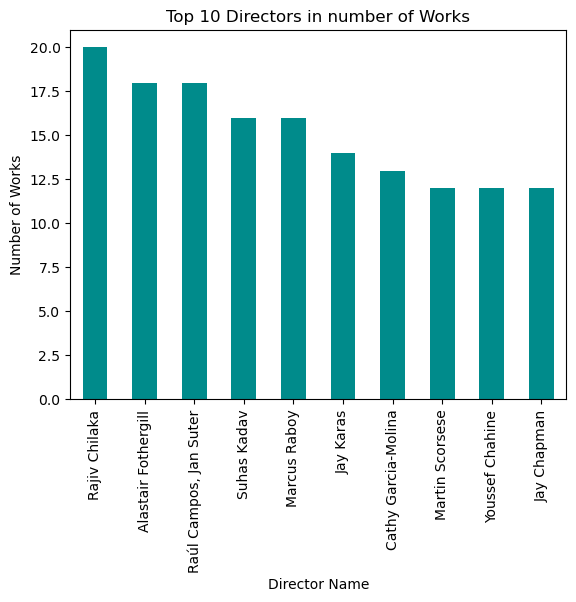

In [14]:
top_10_directors.plot(kind = 'bar', 
                     title = 'Top 10 Directors in number of Works',
                     xlabel = 'Director Name',
                     ylabel = 'Number of Works',
                     color = 'darkcyan');

In [15]:
top_10_countries = df['country'].value_counts().head(10)

In [16]:
top_10_countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

### Q3) What are the top 10 countries in the production of works of art? 

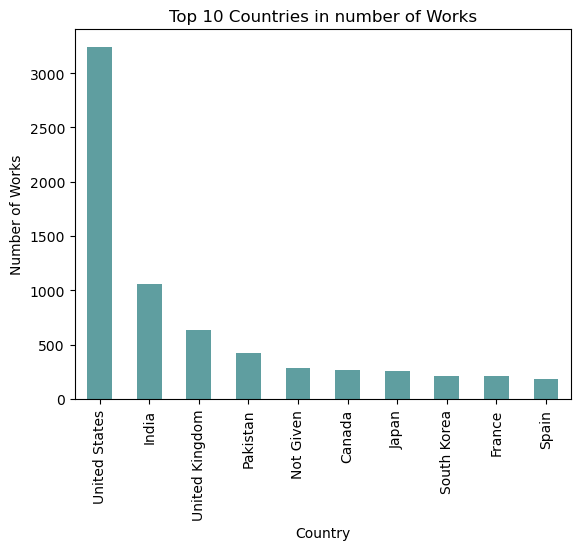

In [17]:
top_10_countries.plot(kind = 'bar', 
                     title = 'Top 10 Countries in number of Works',
                     xlabel = 'Country',
                     ylabel = 'Number of Works',
                     color = 'cadetblue');

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [20]:
months = df['date_added'].dt.month.value_counts()

### Q4) What is the highest month in issuing works during the year?

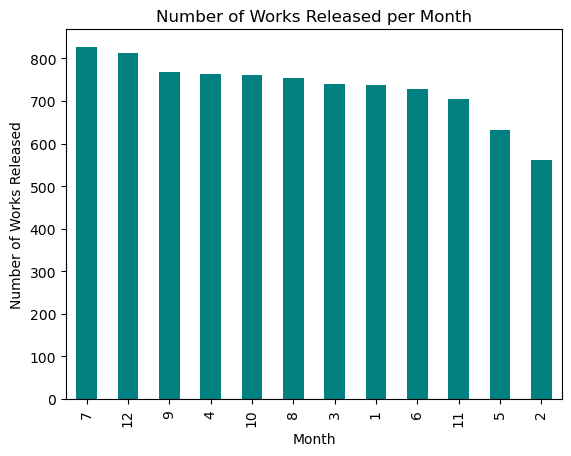

In [21]:
months.plot(kind = 'bar',
           xlabel = 'Month',
           ylabel = 'Number of Works Released',
           title = 'Number of Works Released per Month',
           color = 'teal');

In [22]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
rating = df['rating'].value_counts().head(10)

In [24]:
rating

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

### Q5) What are the top 10 ratings ?

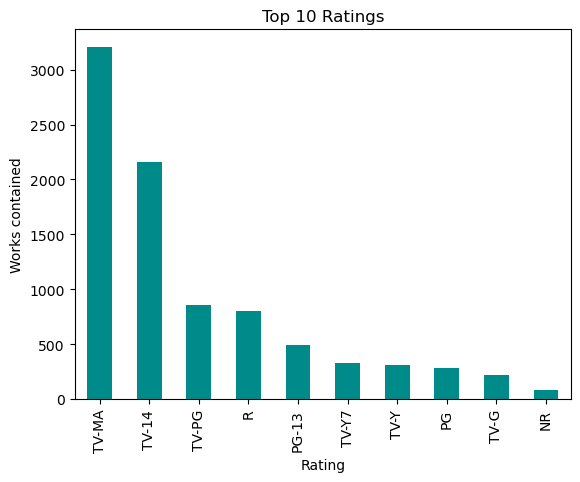

In [25]:
rating.plot(kind = 'bar', 
                     title = 'Top 10 Ratings',
                     xlabel = 'Rating',
                     ylabel = 'Works contained',
                     color = 'darkcyan');

In [26]:
#make a subset
df_2021 = df[df['release_year'] == 2021]

In [27]:
df_2021.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"


In [28]:
df_2021.shape

(592, 10)

In [29]:
df_2021['director'].value_counts().head(10)

Not Given                          288
Krysia Plonka, Kristian Mercado      5
Rathindran R Prasad                  4
Leigh Janiak                         3
Julien Leclercq                      2
Bruno Garotti                        2
Keishi Otomo                         2
Prakash Satam                        2
Chapman Way, Maclain Way             2
Troy Miller                          2
Name: director, dtype: int64

In [30]:
top_10_directors_in_2021 = df_2021['director'].value_counts()[1:11]

In [31]:
top_10_directors_in_2021

Krysia Plonka, Kristian Mercado    5
Rathindran R Prasad                4
Leigh Janiak                       3
Julien Leclercq                    2
Bruno Garotti                      2
Keishi Otomo                       2
Prakash Satam                      2
Chapman Way, Maclain Way           2
Troy Miller                        2
Ben Simms                          2
Name: director, dtype: int64

### Q6) Who are the 10 Directors in a number of works in 2021?


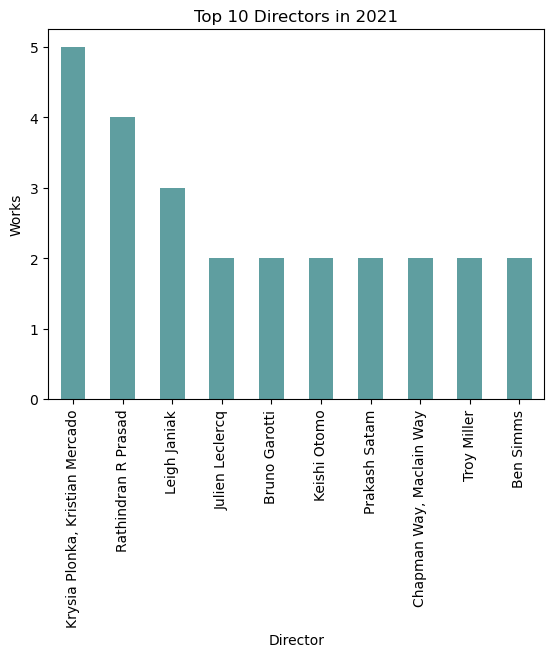

In [32]:
top_10_directors_in_2021.plot(kind = 'bar', 
                     title = 'Top 10 Directors in 2021',
                     xlabel = 'Director',
                     ylabel = 'Works',
                     color = 'cadetblue');